In [ ]:
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt



In [ ]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

In [228]:
from collections import defaultdict
import random
from sklearn.metrics import top_k_accuracy_score

In [ ]:
model=nn.Sequential(
      nn.Linear(INPUT_SIZE, EMBEDDING_SIZE),
      nn.ReLU(),
      nn.Linear(EMBEDDING_SIZE, OUTPUT_SIZE),
      ).to(device)

In [168]:
data=np.load("walking_data.npz")
label=np.load("walking_labels.npz")
data=data.f.arr_0
label=label.f.arr_0

In [169]:
train_mask = label<=20

train_label = label[train_mask]
test_label = label[np.logical_not(train_mask)]
data=torch.Tensor(data)
# label=torch.Tensor(label)
train_data = data[train_mask]
test_data=data[np.logical_not(train_mask)]
train_data=torch.flatten(train_data,1,2)
test_data=torch.flatten(test_data,1,2)

In [ ]:
data.shape

(355, 120, 6)

In [170]:
label.shape

(355,)

In [171]:
test_label

array([23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 29.,
       29., 29., 29., 29., 29., 27., 27., 27., 27., 27., 27., 24., 24.,
       24., 24., 24., 24., 26., 26., 26., 26., 26., 26., 28., 28., 28.,
       28., 28., 28., 22., 22., 22., 22., 29., 29., 29., 29., 29., 29.,
       25., 25., 25., 25., 25., 25., 25., 22., 22., 22., 22., 30., 30.,
       30., 30., 30., 30., 26., 26., 26., 26., 26., 26., 21., 21., 21.,
       21., 21., 21., 30., 30., 30., 30., 30., 30., 21., 21., 21., 21.,
       21., 24., 24., 24., 24., 24., 24., 27., 27., 27., 27., 27., 27.,
       25., 25., 25., 25., 25., 25., 25., 28., 28., 28., 28., 28., 28.])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:27.)
  """


torch.Size([117])

In [ ]:
out=model(torch.rand(5,INPUT_SIZE))#noofels,inputdim

In [ ]:
accum=sum(out)#calculate loss on acum

In [ ]:
accum[0].backward()

In [ ]:
model[0].weight.grad.shape

torch.Size([64, 300])

In [ ]:
model.zero_grad()

In [ ]:
INPUT_SIZE=720
EMBEDDING_SIZE=128
OUTPUT_SIZE=INPUT_SIZE
model=nn.Sequential(
      nn.Linear(INPUT_SIZE, EMBEDDING_SIZE),
      nn.ReLU(),
      nn.Linear(EMBEDDING_SIZE, OUTPUT_SIZE),
      ).to(device)
Epochs=1000
# inplen=720
# input=torch.rand(inplen,INPUT_SIZE)
lr=0.0001

losses=[]



  


In [239]:
for i in range(Epochs):
  out=model(train_data)
  loss=torch.linalg.norm(out-train_data,2)/len(flat)
  losses.append(loss.detach().numpy())
  loss.backward()
  dx1=model[0].weight.grad
  dx2=model[2].weight.grad
  db1=model[0].bias.grad
  db2=model[2].bias.grad
  with torch.no_grad():
    model[0].weight-=lr*dx1
    model[2].weight-=lr*dx2
    model[0].bias-=lr*db1
    model[2].bias-=lr*db2
  model.zero_grad()




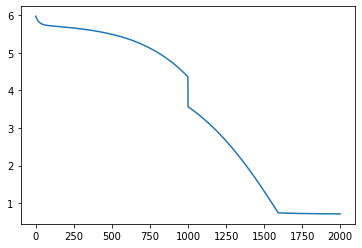

In [240]:
plt.plot(losses)

In [ ]:
loss

tensor(3.3759, grad_fn=<DivBackward0>)

In [ ]:
model[0].weight.transpose

<function Parameter.transpose>

In [ ]:
model[0].weight.shape

torch.Size([64, 300])

In [ ]:
torch.matmul(model[0].weight,torch.transpose(input,0,1)).shape

torch.Size([64, 100])

In [ ]:
torch.transpose(input,0,1)

tensor([[0.5577, 0.8131, 0.1511,  ..., 0.2278, 0.1950, 0.0324],
        [0.7290, 0.6188, 0.6305,  ..., 0.4273, 0.8893, 0.3462],
        [0.1888, 0.3974, 0.5294,  ..., 0.3098, 0.4934, 0.8843],
        ...,
        [0.5101, 0.7574, 0.0120,  ..., 0.0344, 0.6301, 0.0740],
        [0.0600, 0.4531, 0.2085,  ..., 0.8200, 0.2159, 0.3827],
        [0.6715, 0.1230, 0.2031,  ..., 0.4231, 0.5622, 0.2540]])

In [205]:
sampled_classes=defaultdict()
classmaps=defaultdict(list)
for i in range(len(test_label)):
  classmaps[test_label[i]].append(test_data[i])

for i in classmaps.keys():
  sampled_classes[i]=classmaps[i][random.randint(0,len(classmaps[i])-1)]

    

In [261]:
def getres(test,label):
  out=torch.transpose(torch.matmul(model[0].weight,torch.transpose(test_data,0,1)),0,1)
  dis=defaultdict()
  result=list()
  for j in range(len(test_label)):
    sampled_classes=defaultdict()
    classmaps=defaultdict(list)
    for i in range(len(test_label)):
      classmaps[test_label[i]].append(test_data[i])
    for i in classmaps.keys():
      sampled_classes[i]=classmaps[i][random.randint(0,len(classmaps[i])-1)]
    
    for i in sampled_classes.keys():
      dis[i]=torch.linalg.norm(out[j]-torch.matmul(model[0].weight,(sampled_classes[i])),2)
    tmp=[]
    for i in sorted(dis.keys()):
      tmp.append(dis[i].detach().numpy())
    for i in range(len(tmp)):
      tmp[i]=-tmp[i]
      
    soft = np.exp(tmp)/sum(np.exp(tmp))  
    result.append(soft)

    

  return result

  













In [262]:
x=getres(test_data,test_label)

In [263]:
top_k_accuracy_score(test_label,x,k=1)

0.3333333333333333

In [264]:
top_k_accuracy_score(test_label,x,k=3)

0.48717948717948717

In [265]:
top_k_accuracy_score(test_label,x,k=5)

0.7094017094017094

In [ ]:
test_label.shape

torch.Size([117])

In [ ]:
tmp[0].shape

torch.Size([64])

In [218]:
torch.matmul(model[0].weight,sampled_classes[30])

tensor([ 4.2565, -1.3604,  2.0907, -0.8187, -0.4037, -2.4707, -3.1666,  6.1217,
        -2.0057, -3.1877, -0.6512, -2.0278,  5.6821, -1.6493, 18.4333,  4.7704,
        -1.1537, -2.6789, -3.6675, -2.1137, -4.2887, -3.1078,  5.9577,  7.5305,
        -1.9205,  9.7390,  1.4978,  6.9818, -2.2137,  8.5090, -5.3445, -1.5585,
        -1.7393, 10.6323, -0.3552,  9.6060, -3.3463, -1.7799,  1.5929,  5.5509,
        -1.3394, 10.8002,  4.4214, -0.1823,  2.8823, -2.7150,  2.5288, -2.4996,
        -1.4093, -2.5644, -4.9027, 11.8386, -2.6780, 11.0619, -1.0192, 12.2552,
        -1.1464, -1.2348, -3.6113, -1.2274, -2.0912, -1.5352, -1.3476,  2.2571],
       grad_fn=<MvBackward0>)

In [210]:
sampled_classes[30].shape

torch.Size([720])

In [212]:
model[0].weight.shape

torch.Size([64, 720])

In [215]:
torch.matmul(model[0].weight,(sampled_classes[30])).shape

torch.Size([64])

In [225]:
torch.transpose(torch.matmul(model[0].weight,torch.transpose(test_data,0,1)),0,1)[0]-torch.matmul(model[0].weight,(sampled_classes[30]))

tensor([-0.0402,  0.0778,  1.8058, -2.3991, -0.2574,  1.2662,  0.9713, -0.8842,
        -1.5171,  0.6892, -0.9853,  0.0825,  1.4043, -0.5856, -1.1596,  0.4932,
        -2.2247,  2.0677,  0.3661, -0.4671,  0.7638,  0.2454, -3.2358, -0.2213,
         0.2458, -1.7151,  1.2082,  1.4072,  0.5134, -1.5309, -0.0703, -0.3724,
        -1.1837, -1.4596, -2.1969, -0.4875,  3.1668, -1.1435,  2.4620, -1.8393,
         0.1828, -3.5376,  0.3450, -1.1250, -1.6952,  0.5976, -0.4327,  0.7443,
        -1.8676,  1.2341,  2.0828, -0.6235,  1.2514,  0.9495, -0.8273, -0.3569,
         1.1728,  0.1946,  0.3194, -1.4630, -1.0952, -0.9275,  0.0082, -0.6054],
       grad_fn=<SubBackward0>)

In [223]:
torch.transpose(torch.matmul(model[0].weight,torch.transpose(test_data,0,1)),0,1)[0].shape

torch.Size([64])

In [224]:
torch.matmul(model[0].weight,(sampled_classes[30])).shape

torch.Size([64])